#### reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/dataset.csv')

In [3]:
data.drop(['id','diagnosis','Unnamed: 32'], inplace=True, axis=1)

In [4]:
#data.transpose()[[0,1,2,3,4]]

#### data preprocessing

- remove high correlated columns

In [5]:
from utilities.pre_processing import rmcor

In [6]:
un_cor_data = rmcor(data)

In [7]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
un_cor_data.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

  - as we can see 13 columns are highly correlated. For instance one can see radius_mean and area_mean are higly correlated so one of the is removed  
  

In [11]:
data[['radius_mean','area_mean']].corr()

,radius_mean,area_mean
radius_mean,1.000000,0.987357
area_mean,0.987357,1.000000


- scale the data:

In [12]:
from utilities.pre_processing import scale

In [13]:
scaled_data = scale(un_cor_data)

In [15]:
#scaled_data.head()

- reducing dimension of data:

In [16]:
from utilities.pre_processing import pca

In [17]:
reduced_data = pca(scaled_data,n_components=2)

#### clustering 

In [18]:
from kmeans import Kmeans

In [19]:
clustering = Kmeans()

In [20]:
clustered_data = clustering.train(reduced_data)

In [22]:
clustered_data.head()

,component0,component1,cluster
0,5.824255,-1.935409,6
1,-1.094091,0.590768,5
2,2.324215,0.509617,2
3,10.694589,-5.224129,1
4,0.963829,1.362162,2


#### visualizing clusters

In [23]:
from utilities.utility import visualize_2d

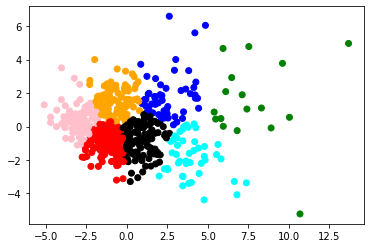

In [24]:
visualize_2d(clustered_data,features=['component0','component1'])